# Import libraries

In [37]:
import pandas as pd
import numpy as np
import os
import config
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import config
from scipy.stats import mannwhitneyu

# Set constants

In [38]:
# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

# set figure details
figsize = (20, 6)
dpi = 200

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc("svg", fonttype="none") 

filename = "violin.svg"

# Import data

In [39]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
y = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.csv"), index_col=[0, 1]).iloc[:, [0]]
GMHI2_scores = pd.read_csv(os.path.join(config.LOG_DIR, "GMHI2_scores_training_set.csv"), index_col=[0, 1])
GMHI_scores = pd.read_csv(os.path.join(config.LOG_DIR, "GMHI_scores_training_set.csv"), index_col=[0, 1])
phenotype = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.csv"), index_col=[0, 1]).iloc[:, [1]]
display(X.head())
display(y.head())
display(GMHI2_scores.head())
display(GMHI_scores.head())

k__Archaea  k__Archaea|p__Euryarchaeota  \
Study_ID Sample Accession                                            
GMHI-10  SAMN03283239        0.000000                     0.000000   
         SAMN03283266        0.000000                     0.000000   
         SAMN03283281        0.009764                     0.009764   
         SAMN03283294        0.000000                     0.000000   
         SAMN03283288        0.011865                     0.011865   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Study_ID Sample Accession                                                   
GMHI-10  SAMN03283239                                            0.000000   
         SAMN03283266                                            0.000000   
         SAMN03283281                                            0.009764   
         SAMN03283294                                            0.000000   
         SAMN03283288                                            0.011865   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Study_ID Sample Accession                                                                         
GMHI-10  SAMN03283239                                               0.000000                      
         SAMN03283266                                               0.000000                      
         SAMN03283281                                               0.009764                      
         SAMN03283294                                               0.000000                      
         SAMN03283288                                               0.011865                      

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Study_ID Sample Accession                                                                                                
GMHI-10  SAMN03283239                                               0.000000                                             
         SAMN03283266                                               0.000000                                             
         SAMN03283281                                               0.009764                                             
         SAMN03283294                                               0.000000                                             
         SAMN03283288                                               0.011865                                             

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Study_ID Sample Accession                                                                                                                      
GMHI-10  SAMN03283239                                               0.000000                                                                   
         SAMN03283266                                               0.000000                                                                   
         SAMN03283281                                               0.009764                                                                   
         SAMN03283294                                               0.000000                                                                   
         SAMN03283288                                               0.011865                                                                   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                                                                                                                                    
GMHI-10  SAMN03283239                                               0.000000              

PHENOTYPE:Healthy_Nonhealthy
Study_ID Sample Accession                              
GMHI-10  SAMN03283239                              True
         SAMN03283266                              True
         SAMN03283281                              True
         SAMN03283294                              True
         SAMN03283288                              True

GMHI2
Study_ID Sample Accession          
GMHI-10  SAMN03283239      1.835237
         SAMN03283266      0.103722
         SAMN03283281      1.116329
         SAMN03283294      1.758818
         SAMN03283288      1.675791

GMHI
Study_ID Sample Accession          
GMHI-10  SAMN03283239      3.832094
         SAMN03283266      1.758548
         SAMN03283281      3.341858
         SAMN03283294      1.429055
         SAMN03283288      1.064592

# Compute other ecological indices for comparisons

## Compute Richness

In [40]:
X_species = X[list(filter(lambda x : "s__" in x, X.columns))]
richness = pd.DataFrame((X_species > config.PRESENCE_CUTOFF).sum(axis=1), columns=["Species Richness"])
richness

Species Richness
Study_ID  Sample Accession                  
GMHI-10   SAMN03283239                    51
          SAMN03283266                    76
          SAMN03283281                    74
          SAMN03283294                    94
          SAMN03283288                   113
...                                      ...
Yang_2020 SRR6456373                      73
          SRR6456374                      80
          SRR6456375                      90
          SRR6456376                      89
          SRR6456377                      77

[8069 rows x 1 columns]

## Compute Shannon Diversity

In [41]:
shannon = pd.DataFrame(np.sum((-X_species * np.log(X_species)).fillna(0), axis=1), columns=["Shannon Diversity"])
shannon

/Users/daniel/opt/anaconda3/envs/gmwi2_analysis/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Shannon Diversity
Study_ID  Sample Accession                   
GMHI-10   SAMN03283239               2.429760
          SAMN03283266               2.711069
          SAMN03283281               2.885216
          SAMN03283294               2.533818
          SAMN03283288               3.133189
...                                       ...
Yang_2020 SRR6456373                 2.393276
          SRR6456374                 2.682308
          SRR6456375                 2.734653
          SRR6456376                 2.763858
          SRR6456377                 1.725367

[8069 rows x 1 columns]

## Compute Simpsons Diversity

In [42]:
simpson = pd.DataFrame(1 - np.sum(X_species ** 2, axis=1), columns=["Simpson Diversity"])
simpson

Simpson Diversity
Study_ID  Sample Accession                   
GMHI-10   SAMN03283239               0.803097
          SAMN03283266               0.880476
          SAMN03283281               0.903475
          SAMN03283294               0.841909
          SAMN03283288               0.901469
...                                       ...
Yang_2020 SRR6456373                 0.829690
          SRR6456374                 0.906057
          SRR6456375                 0.933497
          SRR6456376                 0.934235
          SRR6456377                 0.606075

[8069 rows x 1 columns]

# Aggregate data and plot!

In [43]:
num_healthy = y.values.sum()
num_nonhealthy = y.shape[0] - y.values.sum()
num_healthy, num_nonhealthy

(5547, 2522)

In [44]:
healthy_nonhealthy = y.copy()
healthy_nonhealthy.columns = ["Health status"]
healthy_text = f"Healthy\n ({num_healthy})"
nonhealthy_text = f"Nonhealthy\n ({num_nonhealthy})"
healthy_nonhealthy[y.values] = healthy_text
healthy_nonhealthy[~y.values] = nonhealthy_text

data = pd.concat([GMHI2_scores, GMHI_scores, healthy_nonhealthy, richness, shannon, simpson], axis=1)
data

GMHI2      GMHI     Health status  \
Study_ID  Sample Accession                                         
GMHI-10   SAMN03283239      1.835237  3.832094  Healthy\n (5547)   
          SAMN03283266      0.103722  1.758548  Healthy\n (5547)   
          SAMN03283281      1.116329  3.341858  Healthy\n (5547)   
          SAMN03283294      1.758818  1.429055  Healthy\n (5547)   
          SAMN03283288      1.675791  1.064592  Healthy\n (5547)   
...                              ...       ...               ...   
Yang_2020 SRR6456373       -1.029233 -4.472053  Healthy\n (5547)   
          SRR6456374       -0.941967 -2.158801  Healthy\n (5547)   
          SRR6456375       -0.030621  0.280615  Healthy\n (5547)   
          SRR6456376        0.973798  1.132266  Healthy\n (5547)   
          SRR6456377       -0.066339 -0.305132  Healthy\n (5547)   

                            Species Richness  Shannon Diversity  \
Study_ID  Sample Accession                                        
GMHI-10   SAMN03283239                    51           2.429760   
          SAMN03283266                    76           2.711069   
          SAMN03283281                    74           2.885216   
          SAMN03283294                    94           2.533818   
          SAMN03283288                   113           3.133189   
...                                      ...                ...   
Yang_2020 SRR6456373                      73           2.393276   
          SRR6456374                      80           2.682308   
          SRR6456375                      90           2.734653   
          SRR6456376                      89           2.763858   
          SRR6456377                      77           1.725367   

                            Simpson Diversity  
Study_ID  Sample Accession                     
GMHI-10   SAMN03283239               0.803097  
          SAMN03283266               0.880476  
          SAMN03283281               0.903475  
          SAMN03283294               0.841909  
          SAMN03283288               0.901469  
...                                       ...  
Yang_2020 SRR6456373                 0.829690  
          SRR6456374                 0.906057  
          SRR6456375                 0.933497  
          SRR6456376                 0.934235  
          SRR6456377                 0.606075  

[8069 rows x 6 columns]

In [45]:
def observeDifference(a, b):
    u, man_whitney_u_p_val = mannwhitneyu(a, b)
    cliffs_delta = (2 * u) / (a.shape[0] * b.shape[0]) - 1
    return cliffs_delta, man_whitney_u_p_val

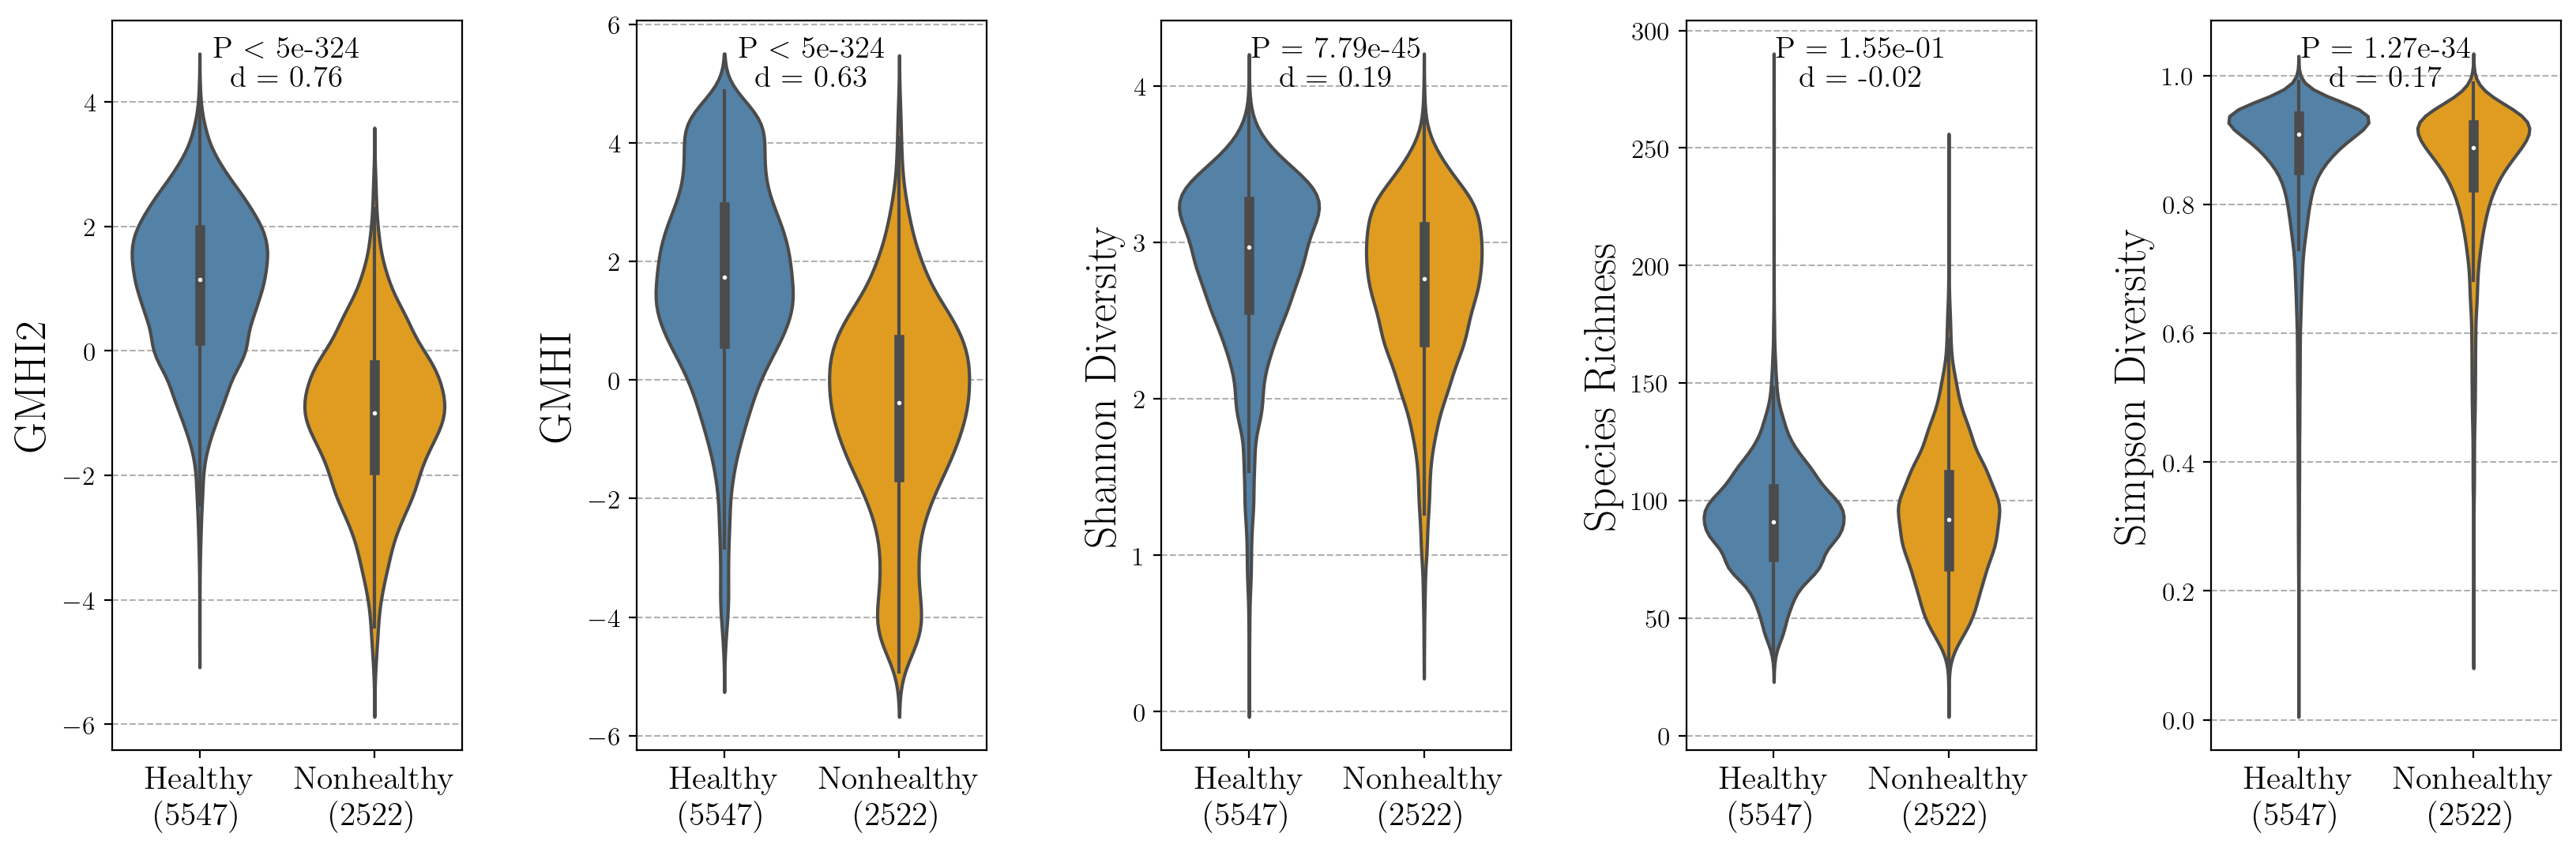

In [46]:
fig, axs = plt.subplots(ncols=5, figsize=figsize, dpi=dpi)
indices = ["GMHI2", "GMHI", "Shannon Diversity","Species Richness", "Simpson Diversity"]
for ind, ax in zip(indices, axs):
    v = sns.violinplot(x="Health status", y=ind, data=data, ax=ax, 
                   palette={healthy_text : healthy_color, nonhealthy_text : nonhealthy_color})
    cliffs_delta, man_whitney_u_p_val = observeDifference(data[ind].iloc[y.values], data[ind].iloc[~y.values])
    
    p_text = (r"P $<$ " + str(np.nextafter(0, 1))) if man_whitney_u_p_val == 0 else (
        r"P = " + str(np.format_float_scientific(man_whitney_u_p_val, precision=2))
    )
    
    ax.text(0.5, 0.95, p_text, fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    ax.text(0.5, 0.91, f"d = {'%.2f' % cliffs_delta}", fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    
    v.tick_params(axis="y", labelsize=12)
    v.tick_params(axis="x", labelsize=15)
    ax.yaxis.label.set_size(20)
    ax.set_axisbelow(True)
    ax.grid(linestyle = '--', axis="y", linewidth = 0.75)
    ax.set_xlabel("")
fig.subplots_adjust(wspace=0.5)
plt.savefig(os.path.join(config.FIGURE_DIR, filename))

In [47]:
data

GMHI2      GMHI     Health status  \
Study_ID  Sample Accession                                         
GMHI-10   SAMN03283239      1.835237  3.832094  Healthy\n (5547)   
          SAMN03283266      0.103722  1.758548  Healthy\n (5547)   
          SAMN03283281      1.116329  3.341858  Healthy\n (5547)   
          SAMN03283294      1.758818  1.429055  Healthy\n (5547)   
          SAMN03283288      1.675791  1.064592  Healthy\n (5547)   
...                              ...       ...               ...   
Yang_2020 SRR6456373       -1.029233 -4.472053  Healthy\n (5547)   
          SRR6456374       -0.941967 -2.158801  Healthy\n (5547)   
          SRR6456375       -0.030621  0.280615  Healthy\n (5547)   
          SRR6456376        0.973798  1.132266  Healthy\n (5547)   
          SRR6456377       -0.066339 -0.305132  Healthy\n (5547)   

                            Species Richness  Shannon Diversity  \
Study_ID  Sample Accession                                        
GMHI-10   SAMN03283239                    51           2.429760   
          SAMN03283266                    76           2.711069   
          SAMN03283281                    74           2.885216   
          SAMN03283294                    94           2.533818   
          SAMN03283288                   113           3.133189   
...                                      ...                ...   
Yang_2020 SRR6456373                      73           2.393276   
          SRR6456374                      80           2.682308   
          SRR6456375                      90           2.734653   
          SRR6456376                      89           2.763858   
          SRR6456377                      77           1.725367   

                            Simpson Diversity  
Study_ID  Sample Accession                     
GMHI-10   SAMN03283239               0.803097  
          SAMN03283266               0.880476  
          SAMN03283281               0.903475  
          SAMN03283294               0.841909  
          SAMN03283288               0.901469  
...                                       ...  
Yang_2020 SRR6456373                 0.829690  
          SRR6456374                 0.906057  
          SRR6456375                 0.933497  
          SRR6456376                 0.934235  
          SRR6456377                 0.606075  

[8069 rows x 6 columns]

In [48]:
data.to_csv(os.path.join(config.FIG_DATA_DIR, "1e_violin_updated.csv"))

# Phenotype distributions

In [49]:
phenotypes = np.unique(phenotype.values)
phenotypes

array(['Ankylosing spondylitis', 'Atherosclerotic cardiovascular disease',
       'Colorectal cancer', "Crohn's Disease", 'Graves’ disease',
       'Healthy', 'Liver Cirrhosis', 'MS', 'NAFLD',
       'Rheumatoid arthritis', 'Type 2 diabetes', 'Ulcerative colitis'],
      dtype=object)

In [50]:
scores = {p : GMHI2_scores[phenotype.iloc[:, 0] == p].values.flatten() for p in phenotypes}

In [51]:
means = {p : scores[p].mean() for p in scores}

In [52]:
sorted_phenotypes = sorted(list(phenotypes), key=lambda x : means[x], reverse=True)
sorted_phenotypes

['Healthy',
 'MS',
 'Ankylosing spondylitis',
 'Ulcerative colitis',
 'Rheumatoid arthritis',
 'NAFLD',
 'Type 2 diabetes',
 "Crohn's Disease",
 'Graves’ disease',
 'Colorectal cancer',
 'Liver Cirrhosis',
 'Atherosclerotic cardiovascular disease']

In [53]:
phenotype_to_label = {
    "Healthy" : "Healthy",
    'MS' : "MS",
    'Ankylosing spondylitis' : "AS",
    'Ulcerative colitis' : "UC",
    'Rheumatoid arthritis' : "RA",
    'NAFLD' : "NAFLD",
    'Type 2 diabetes' : "T2D",
    "Crohn's Disease" : "CD",
    'Graves’ disease' : "GD",
    'Colorectal cancer' : "CC",
    'Liver Cirrhosis' : "LC",
    'Atherosclerotic cardiovascular disease' : "ACVD"
}

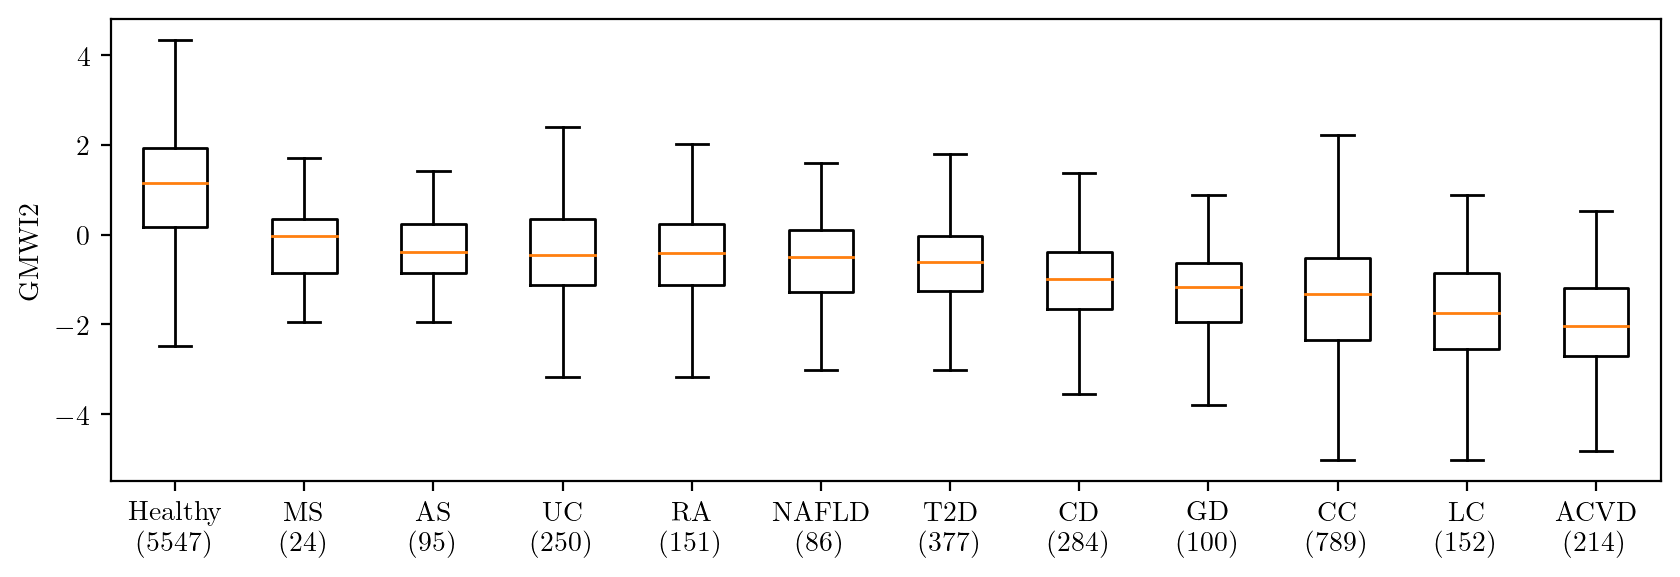

In [54]:
plt.figure(figsize =(10, 3), dpi=200)

labels = [phenotype_to_label[p] + f"\n({phenotype.iloc[phenotype.values == p].shape[0]})" for p in sorted_phenotypes]

plt.boxplot([scores[p] for p in sorted_phenotypes], labels=labels, showfliers=False)

plt.ylabel("GMWI2")

plt.show()

In [22]:
scores

{'Ankylosing spondylitis': array([-0.44402982, -1.62143109, -0.50909905,  0.3618424 , -0.93443948,
         0.14636322,  0.83775848, -0.64676136, -0.68332658,  0.46324968,
        -0.38484167,  0.62378132, -0.64037672,  1.15730614, -0.589719  ,
        -0.55225783, -0.2070036 , -1.24672663, -0.83995553, -2.79545162,
        -0.15709834, -0.995367  , -0.85457914,  0.30396704, -1.55640183,
        -0.27357008, -1.25863424, -0.46305516, -1.95034653, -0.37198181,
         0.17116143,  0.25679972, -1.55248713, -0.45306069, -0.27854356,
         0.81005645, -0.41379464, -1.40804818, -0.82478846,  1.42051666,
        -1.40475885,  0.30453479, -1.51623319, -0.66419746, -0.60554695,
        -1.4863928 , -1.19379171, -1.18964875, -1.94147553, -0.88777198,
        -0.90467307, -0.63201189,  0.1478961 , -1.64815605, -0.08633137,
        -0.07055006, -0.03156018, -0.89944359, -0.32697919, -1.08692039,
        -0.47339139, -0.7837746 , -0.75314819, -0.13308818, -0.97743371,
         0.34753134, -0.8

In [23]:
phenotype_distribution_df = pd.concat([GMHI2_scores, phenotype], axis=1)
phenotype_distribution_df

GMHI2 PHENOTYPE_Disease
Study_ID  Sample Accession                            
GMHI-10   SAMN03283239      1.835237           Healthy
          SAMN03283266      0.103722           Healthy
          SAMN03283281      1.116329           Healthy
          SAMN03283294      1.758818           Healthy
          SAMN03283288      1.675791           Healthy
...                              ...               ...
Yang_2020 SRR6456373       -1.029233           Healthy
          SRR6456374       -0.941967           Healthy
          SRR6456375       -0.030621           Healthy
          SRR6456376        0.973798           Healthy
          SRR6456377       -0.066339           Healthy

[8069 rows x 2 columns]

In [24]:
phenotype_distribution_df.to_csv(os.path.join(config.FIG_DATA_DIR, "1f_phenotypes.csv"))

# Correlation

PearsonRResult(statistic=0.8089177843242584, pvalue=0.0)


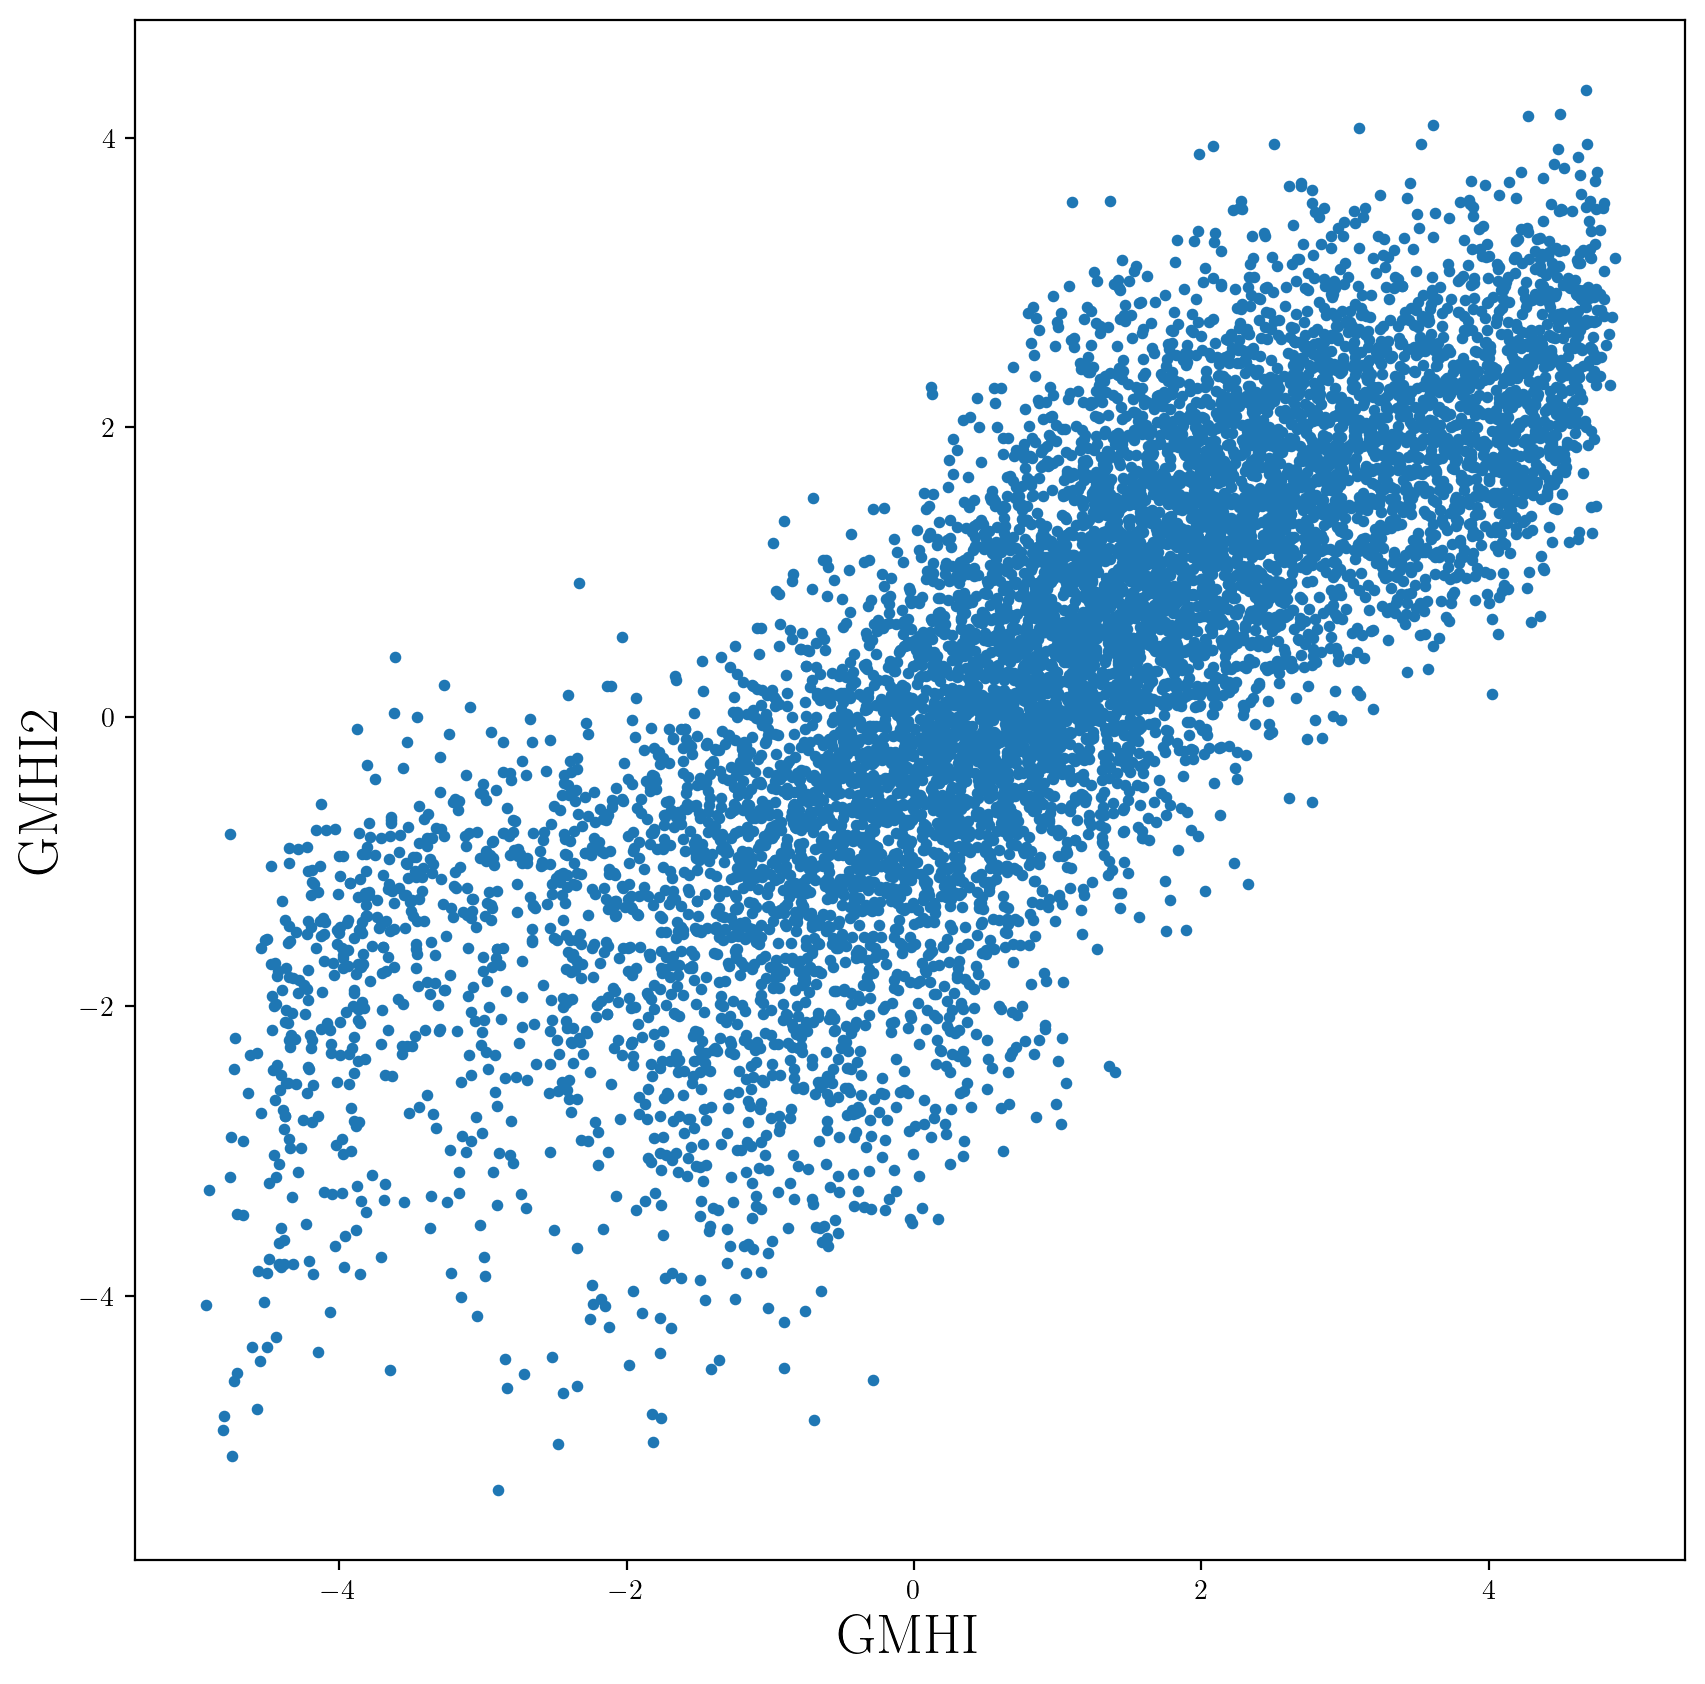

In [36]:
from scipy.stats import pearsonr

plt.figure(figsize=(10, 10), dpi=200)

plt.scatter(GMHI_scores, GMHI2_scores, s=10)
plt.xlabel("GMHI", fontsize=20)
plt.ylabel("GMHI2", fontsize=20)
print(pearsonr(GMHI_scores.values.flatten(), GMHI2_scores.values.flatten()))

plt.savefig(os.path.join(config.FIGURE_DIR, "correlation.svg"))
plt.show()